In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imgRGB = cv2.imread('lion.jpg')
imgHSV = cv2.imread('lionHSV.jpg')

In [3]:
res = np.concatenate((imgRGB, imgHSV), axis = 1)

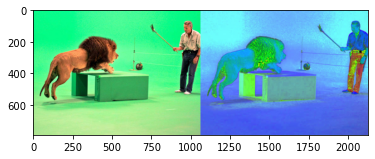

In [4]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

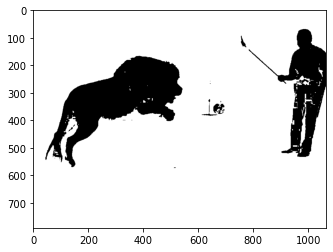

In [5]:
imgB = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2HSV).astype(np.double)
src = imgB[:,:,0]/180

for x in range(src.shape[0]):
    for y in range(src.shape[1]):
        if src[x][y] > 0.22 and src[x][y] < 0.45:
            src[x][y] = 1
        else:
            src[x][y] = 0

plt.imshow(src, cmap = 'gray')

In [6]:
def unique_rows(a):
    a = np.ascontiguousarray(a)
    unique_a = np.unique(a.view([('', a.dtype)]*a.shape[1]))
    return unique_a.view(a.dtype).reshape((unique_a.shape[0], a.shape[1]))

In [7]:
data = np.loadtxt('data.txt')

In [8]:
data_1 = np.array([d for d in data if d[3] == 1],dtype = np.uint8)

In [9]:
imgC = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2RGB)
data_1 = data_1[:,:3]

data_res = unique_rows(data_1)

Time execution: 4.113285064697266 seconds


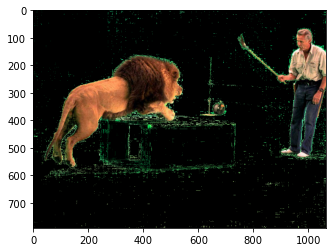

In [10]:
index = np.ones((256,256,256), dtype=np.uint8)
for d in data_res:
    index[d[0]][d[1]][d[2]] = 0
    
import time
start_time = time.time()
for x in range(imgC.shape[0]):
    for y in range(imgC.shape[1]):
        if not index[imgC[x][y][0]][imgC[x][y][1]][imgC[x][y][2]]:
            imgC[x][y] = np.zeros(3, dtype = np.uint8)
print("Time execution: %s seconds" % (time.time() - start_time))
plt.imshow(imgC)